# Mondrian
What has been covered :
* used methods : merge, query, eval 
* plot creation (percentage/overtime)


1. **Analyze painting dimensions over time**  
    
    Plot the length, width, or area of each painting against its creation date. Are there any noticeable trends or patterns?



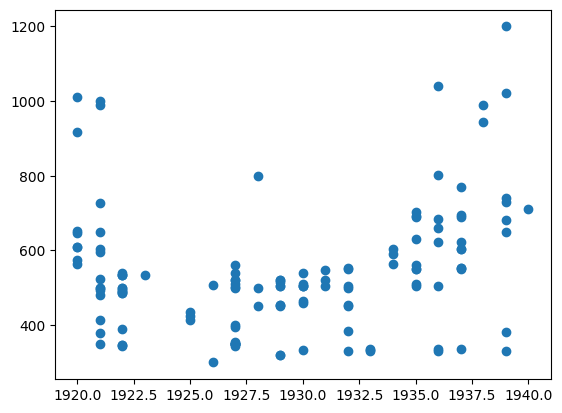

In [30]:
import pandas as pd

# Load
information = pd.read_csv('mondrian-painting-info.csv')
features = pd.read_csv('mondrian-painting-features.csv')

# Merge
evolution = information.merge(features, on="painting_id", how="left")

# Find the length of one's piece = for each (groupby painting_id), show the max width
length = evolution.groupby("painting_id").agg(
    width=("width_x", "max"),
    year=("year", "first")
)

# Plot the evolution of the length overtime
import matplotlib.pyplot as plt

length_evolution = plt.scatter(length['year'], length['width'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
paintings_infos = pd.read_csv('mondrian-painting-info.csv')
paintings_features = pd.read_csv('mondrian-painting-features.csv')
# Merge 
paintings = paintings_infos.merge(paintings_features, on="painting_id", how="left")

# Calculate the area for paintings_info
paintings_infos['area'] = paintings_infos.eval('width * height')

# ==================== BLUE FEATURES ==================== 

# Identify blue color
blue_df = paintings.query('color == "blue"')

# Calculate the area of these blue features
blue_df['area'] = blue_df.eval('width_x * height_x')

# Group blue features by painting_id
blue_by_painting = blue_df.groupby('painting_id').sum()

# ==================== COLORS EVOLUTION OVERTIME ==================== 

# Calculate number of paintings per year
total_paintings_year = paintings_infos.groupby('year').size()

# Calculate total blue features per year
blue_counts = paintings[paintings['color'] == 'blue'].groupby('year').size() # Create a boolean mask of True if color is blue, it will display

# Calculate percentage of blue
percent_blue = (blue_counts / total_paintings_year) * 100
percent_blue.round(2)

# Plot it overtime
plt.figure(figsize=(10,6)) # Width and height
plt.plot(percent_blue, label='Blue (%)', color='blue')

# Same operation, for red
red = paintings[paintings['color'] == 'red'].groupby('year').size()
percent_red = (red / total_paintings_year) * 100
percent_red.round(2)
plt.plot(percent_red, label='Red', color='red')  

# Yellow
yellow = paintings[paintings['color'] == 'yellow'].groupby('year').size()
percent_yellow = (yellow / total_paintings_year) * 100
percent_yellow.round(2)
plt.plot(percent_yellow, label='Yellow', color='yellow')   

# White
white = paintings[paintings['color'] == 'white'].groupby('year').size()
percent_white = (white / total_paintings_year) * 100
percent_white.round(2)
plt.plot(percent_white, label='White', color='violet')   

# Black
black = paintings[paintings['color'] == 'black'].groupby('year').size()
percent_black = (black / total_paintings_year) * 100
percent_black.round(2)
plt.plot(percent_black, label='Black', color='black')  

# Grey
grey = paintings[paintings['color'] == 'grey'].groupby('year').size()
percent_grey = (grey / total_paintings_year) * 100
percent_grey.round(2)
plt.plot(percent_grey, label='Grey', color='grey')  

# Plot format
plt.xlabel('Year')
plt.ylabel('Color presence')
plt.title('Evolution of one color overtime')
plt.show()

